In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from glob import glob

In [2]:
test = [1,2,3]
test[:-1]

[1, 2]

In [3]:
# train_file = []
# test_file = []
# for i in range(10):
#     for file in sorted(glob("../Data/rotationver/"+str(i) + "/*" )):
#         train_file.append(file)
#     test_file = test_file + train_file[-62:-31]
#     train_file = train_file[:-62] + train_file[-31:]
    

In [ ]:
train_file = []
for i in range(10):
    for file in sorted(glob("../Data/rotationver/"+str(i) + "/*" )):
        train_file.append(file)

    

In [11]:
test_file = []
for i in range(10):
    for file in sorted(glob("../Data/jaehwan/%d_*"%i )):
        test_file.append(file)


In [12]:
test_file

['../Data/jaehwan/0_b.png',
 '../Data/jaehwan/0_g.png',
 '../Data/jaehwan/0_n.png',
 '../Data/jaehwan/1_b.png',
 '../Data/jaehwan/1_g.png',
 '../Data/jaehwan/1_n.png',
 '../Data/jaehwan/2_b.png',
 '../Data/jaehwan/2_g.png',
 '../Data/jaehwan/2_n.png',
 '../Data/jaehwan/3_b.png',
 '../Data/jaehwan/3_g.png',
 '../Data/jaehwan/3_n.png',
 '../Data/jaehwan/4_b.png',
 '../Data/jaehwan/4_g.png',
 '../Data/jaehwan/4_n.png',
 '../Data/jaehwan/5_b.png',
 '../Data/jaehwan/5_g.png',
 '../Data/jaehwan/5_n.png',
 '../Data/jaehwan/6_b.png',
 '../Data/jaehwan/6_g.png',
 '../Data/jaehwan/6_n.png',
 '../Data/jaehwan/7_b.png',
 '../Data/jaehwan/7_g.png',
 '../Data/jaehwan/7_n.png',
 '../Data/jaehwan/8_b.png',
 '../Data/jaehwan/8_g.png',
 '../Data/jaehwan/8_n.png',
 '../Data/jaehwan/9_b.png',
 '../Data/jaehwan/9_g.png',
 '../Data/jaehwan/9_n.png']

In [14]:
train_data = np.zeros((len(train_file), 400,400))
count = 0

for file in sorted(train_file):
    train_data[count,:,:] = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    count+=1
    
test_data = np.zeros((len(test_file), 400,400))
count = 0
for file in sorted(test_file):
    tmp_img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    tmp_img = cv2.resize(tmp_img,(400,400))
    res, tmp_img = cv2.threshold(tmp_img, 100, 255, cv2.THRESH_TOZERO)
    test_data[count,:,:] = tmp_img
    count+=1


In [19]:
train_data.shape

(1160, 400, 400)

In [20]:
for i in range(len(train_file)):
    temp_mean = train_data[i,train_data[i,:,:] > 0].mean()
    train_data[i,train_data[i,:,:] > 0] = (train_data[i,train_data[i,:,:] > 0]/ temp_mean) * 150 / 255.0
for i in range(len(test_file)):
    temp_mean = test_data[i,test_data[i,:,:] > 0].mean()
    test_data[i] = (test_data[i]  / temp_mean) * 150 / 255.0

In [21]:
train_data[i,train_data[i,:,:] > 0].shape

(25234,)

In [22]:
test_data[i,test_data[i,:,:] > 0].shape

(32185,)

In [23]:
train_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
print(train_data[train_data > 0].mean())
print(train_data[40,train_data[40,:,:] >0].mean())


0.588235294117648
0.5882352941176471


In [27]:
print(test_data[test_data > 0].mean())
print(test_data[10,test_data[10,:,:] >= 0].mean())

0.5882352941176472
0.1395845588235294


In [29]:
train_target = np.zeros(len(train_file)//10).astype(int)

for i in range(1,10):
    train_target = np.concatenate([train_target,np.full(len(train_file)//10,i)])
    
test_target = np.zeros(len(test_file)//10).astype(int)
for i in range(1,10):
    test_target = np.concatenate([test_target,np.full(len(test_file)//10,i)])

In [30]:
train_data = train_data.reshape(len(train_file),400,400,-1)
test_data = test_data.reshape(len(test_file),400,400,-1)

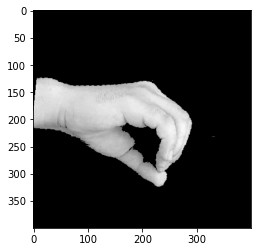

In [31]:
plt.imshow(train_data[0],cmap='gray')

In [319]:
import tensorflow as tf
from tensorflow import keras
import keras.metrics
model = keras.Sequential()
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (400,400,1)
    )
)
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (400,400,1)
    )
)
model.add(
    keras.layers.MaxPool2D(2)
)
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same'
    )
    
)
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same'
    )
)
model.add(
    keras.layers.MaxPool2D(2)
)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))




In [350]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_cnn_model_ASL.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) 

history = model.fit(
    train_data, 
    train_target, 
    epochs = 20,
    validation_data = (test_data, test_target), 
    callbacks = [checkpoint_cb, early_stopping_cb]
)


Epoch 1/20
49/49 [==============================] - 127s 2s/step - loss: 0.0368 - accuracy: 0.9865 - val_loss: 0.0544 - val_accuracy: 0.9903
Epoch 2/20
49/49 [==============================] - 123s 2s/step - loss: 5.2389e-04 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9871
Epoch 3/20
49/49 [==============================] - 119s 2s/step - loss: 5.5816e-05 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9871
Epoch 4/20
49/49 [==============================] - 120s 2s/step - loss: 3.0721e-05 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9871
Epoch 5/20
49/49 [==============================] - 119s 2s/step - loss: 1.7371e-05 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9871
Epoch 6/20
49/49 [==============================] - 125s 3s/step - loss: 9.2903e-06 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 7/20
49/49 [==============================] - 127s 3s/step - loss: 4.7375e-06 - accuracy: 1.0000 - val_loss: 0.0498 - val_accura

In [351]:
from PIL import Image
import cv2

In [352]:
X_test = np.zeros((10,400,400))
for i in range(10):
    test_img = cv2.imread("../Data/youngjin/%d_7.png"%i,cv2.IMREAD_GRAYSCALE)
    test_img = cv2.resize(test_img, (400,400))
    res , th1 = cv2.threshold(test_img,100,255,cv2.THRESH_TOZERO)
    
    
    X_test[i,:,:] = th1
    
    temp_mean = th1[th1>0].mean()
    X_test[i] = (X_test[i]/temp_mean) * 150 / 255.0
    

In [353]:
import matplotlib.pyplot as plt

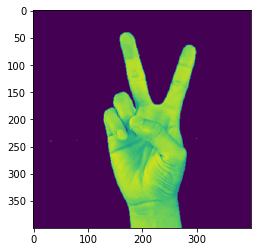

In [354]:
plt.imshow(X_test[2])

In [355]:
y_test = np.arange(10)
X_test = X_test.reshape(10,400,400,1)

In [356]:
pred = model.predict(X_test)

1/1 [==============================] - 1s 685ms/step


In [357]:
for i in range(10):
    print(pred[i].argmax() == y_test[i]) 

True
False
True
True
True
True
True
True
True
False


TypeError: glob() missing 1 required positional argument: 'pathname'